In [ ]:
import pandas as pd
import random

data = []

for _ in range(2000):
    min_font = random.randint(10, 30)
    errors = random.randint(0, 6)
    screen_time = random.randint(1, 12)
    eye_strain = random.choice([0, 1])
    headache = random.choice([0, 1])
    distance = random.randint(25, 70)

    # Rule-based risk label
    if min_font <= 14 and errors <= 1 and screen_time <= 4:
        risk = 0   # Normal
    elif min_font <= 20 and errors <= 3:
        risk = 1   # Mild Risk
    else:
        risk = 2   # High Risk

    data.append([
        min_font, errors, screen_time,
        eye_strain, headache, distance, risk
    ])

columns = [
    "min_font_size",
    "error_count",
    "screen_time",
    "eye_strain",
    "headache",
    "distance_cm",
    "risk_level"
]

df = pd.DataFrame(data, columns=columns)


In [ ]:
df.head()


,min_font_size,error_count,screen_time,eye_strain,headache,distance_cm,risk_level
0,25,5,4,0,0,52,2
1,27,5,5,1,0,63,2
2,13,1,3,1,0,69,0
3,12,1,1,0,0,49,0
4,14,1,12,0,1,56,1


In [ ]:
df.shape


(2000, 7)

In [ ]:
import numpy as np

# Copy original dataset to avoid confusion
df_missing = df.copy()

# Introduce missing values randomly (8–10%)
for col in ["screen_time", "distance_cm", "eye_strain"]:
    df_missing.loc[
        df_missing.sample(frac=0.08, random_state=42).index, col
    ] = np.nan


In [ ]:
df_missing.isnull().sum()


,0
min_font_size,0
error_count,0
screen_time,160
eye_strain,160
headache,0
distance_cm,160
risk_level,0


In [ ]:
df_missing.head()


,min_font_size,error_count,screen_time,eye_strain,headache,distance_cm,risk_level
0,25,5,4.0,0.0,0,52.0,2
1,27,5,5.0,1.0,0,63.0,2
2,13,1,3.0,1.0,0,69.0,0
3,12,1,1.0,0.0,0,49.0,0
4,14,1,12.0,0.0,1,56.0,1


In [ ]:
df_missing.isnull().sum()


,0
min_font_size,0
error_count,0
screen_time,160
eye_strain,160
headache,0
distance_cm,160
risk_level,0


**CLEANING**

In [ ]:
# Fill numerical missing values
df_missing['screen_time'].fillna(
    df_missing['screen_time'].mean(), inplace=True
)

df_missing['distance_cm'].fillna(
    df_missing['distance_cm'].median(), inplace=True
)

# Fill categorical missing values
df_missing['eye_strain'].fillna(
    df_missing['eye_strain'].mode()[0], inplace=True
)


/tmp/ipython-input-2930593116.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_missing['screen_time'].fillna(
/tmp/ipython-input-2930593116.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method(

In [ ]:
df_missing.isnull().sum()


,0
min_font_size,0
error_count,0
screen_time,0
eye_strain,0
headache,0
distance_cm,0
risk_level,0


CLEANED DATASET

In [ ]:
df_missing.head()


,min_font_size,error_count,screen_time,eye_strain,headache,distance_cm,risk_level
0,25,5,4.0,0.0,0,52.0,2
1,27,5,5.0,1.0,0,63.0,2
2,13,1,3.0,1.0,0,69.0,0
3,12,1,1.0,0.0,0,49.0,0
4,14,1,12.0,0.0,1,56.0,1


In [ ]:
df_missing.to_excel("eye_vision_dataset_cleaned.xlsx", index=False)


In [ ]:
df_missing.shape


(2000, 7)

In [ ]:
from IPython.display import display
display(df_missing)


,min_font_size,error_count,screen_time,eye_strain,headache,distance_cm,risk_level
0,25,5,4.0,0.0,0,52.0,2
1,27,5,5.0,1.0,0,63.0,2
2,13,1,3.0,1.0,0,69.0,0
3,12,1,1.0,0.0,0,49.0,0
4,14,1,12.0,0.0,1,56.0,1
...,...,...,...,...,...,...,...
1995,19,4,4.0,1.0,1,58.0,2
1996,17,5,1.0,0.0,1,42.0,2
1997,18,0,10.0,0.0,0,57.0,1
1998,18,3,7.0,1.0,1,57.0,1


(input features and target labels SEPARATED)

In [ ]:
from sklearn.model_selection import train_test_split

X = df_missing.drop("risk_level", axis=1)
y = df_missing["risk_level"]


Split Dataset (Train & Test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Train the Model (Decision Tree)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
y_pred = model.predict(X_test)


Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9675
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.88      1.00      0.94        96
           2       1.00      1.00      1.00       291

    accuracy                           0.97       400
   macro avg       0.63      0.67      0.65       400
weighted avg       0.94      0.97      0.95       400



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **MODEL** **TESTING**

NORMAL

In [ ]:
sample_normal = pd.DataFrame([{
    "min_font_size": 12,
    "error_count": 0,
    "screen_time": 3,
    "eye_strain": 0,
    "headache": 0,
    "distance_cm": 45
}])

model.predict(sample_normal)


array([1])

MILD

In [ ]:
sample_mild = pd.DataFrame([{
    "min_font_size": 17,
    "error_count": 2,
    "screen_time": 6,
    "eye_strain": 1,
    "headache": 0,
    "distance_cm": 40
}])

model.predict(sample_mild)


array([1])

HIGH

In [ ]:
sample_high = pd.DataFrame([{
    "min_font_size": 26,
    "error_count": 5,
    "screen_time": 10,
    "eye_strain": 1,
    "headache": 1,
    "distance_cm": 30
}])

model.predict(sample_high)


array([2])

In [ ]:
risk_map = {0: "Normal", 1: "Mild Risk", 2: "High Risk"}


In [ ]:
import pickle

with open("eye_vision_risk_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [ ]:
import os
os.listdir()


['.config',
 'eye_vision_dataset_cleaned.xlsx',
 'eye_vision_risk_model.pkl',
 'sample_data']

In [ ]:
with open("eye_vision_risk_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

loaded_model.predict(sample_normal)


array([1])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


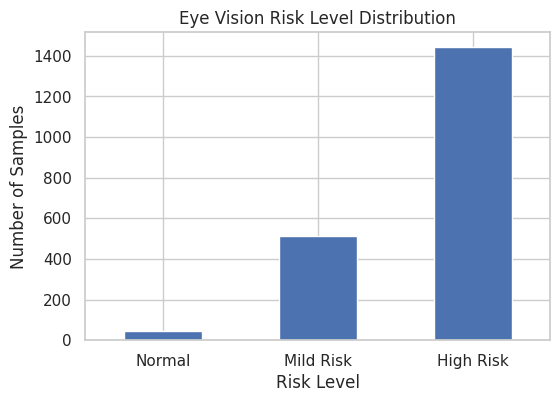

In [ ]:
plt.figure(figsize=(6,4))

df['risk_level'].value_counts().sort_index().plot(
    kind='bar'
)

plt.xlabel("Risk Level")
plt.ylabel("Number of Samples")
plt.title("Eye Vision Risk Level Distribution")

plt.xticks(
    ticks=[0,1,2],
    labels=["Normal", "Mild Risk", "High Risk"],
    rotation=0
)

plt.show()


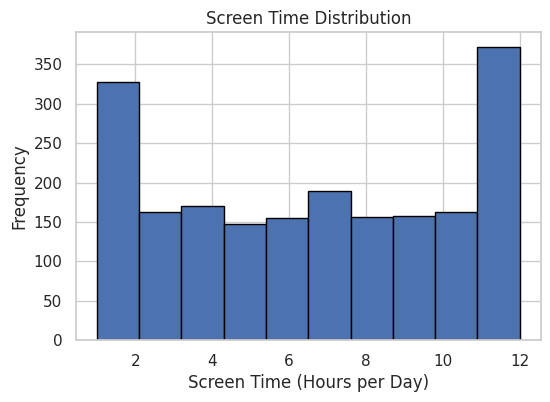

In [ ]:
plt.figure(figsize=(6,4))

plt.hist(
    df['screen_time'],
    bins=10,
    edgecolor='black'
)

plt.xlabel("Screen Time (Hours per Day)")
plt.ylabel("Frequency")
plt.title("Screen Time Distribution")

plt.show()


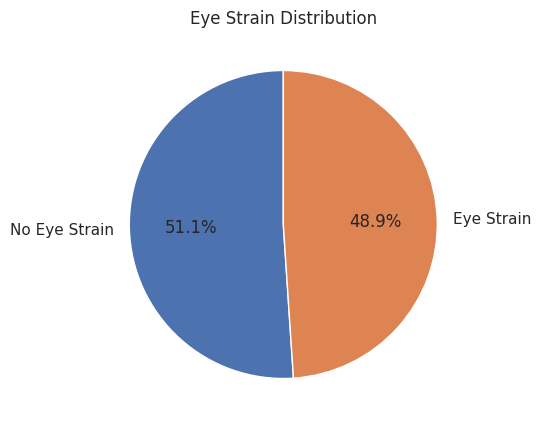

In [ ]:
eye_strain_counts = df['eye_strain'].value_counts()

plt.figure(figsize=(5,5))

plt.pie(
    eye_strain_counts,
    labels=["No Eye Strain", "Eye Strain"],
    autopct='%1.1f%%',
    startangle=90
)

plt.title("Eye Strain Distribution")
plt.show()


In [ ]:
df_clean = df_missing.copy()


In [ ]:
X = df_clean.drop("risk_level", axis=1)
y = df_clean["risk_level"]

print(X.shape)
print(y.shape)


(2000, 6)
(2000,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)


X_train: (1600, 6)
X_test : (400, 6)


In [ ]:
from sklearn.utils import resample

# Separate classes
df_normal = df[df["risk_level"] == 0]
df_mild   = df[df["risk_level"] == 1]
df_high   = df[df["risk_level"] == 2]

# Find max class size
max_count = max(len(df_normal), len(df_mild), len(df_high))

# Oversample minority classes
df_normal_bal = resample(df_normal, replace=True, n_samples=max_count, random_state=42)
df_mild_bal   = resample(df_mild,   replace=True, n_samples=max_count, random_state=42)
df_high_bal   = resample(df_high,   replace=True, n_samples=max_count, random_state=42)

# Combine balanced dataset
df_balanced = pd.concat([df_normal_bal, df_mild_bal, df_high_bal])

print(df_balanced["risk_level"].value_counts())


risk_level
0    1444
1    1444
2    1444
Name: count, dtype: int64


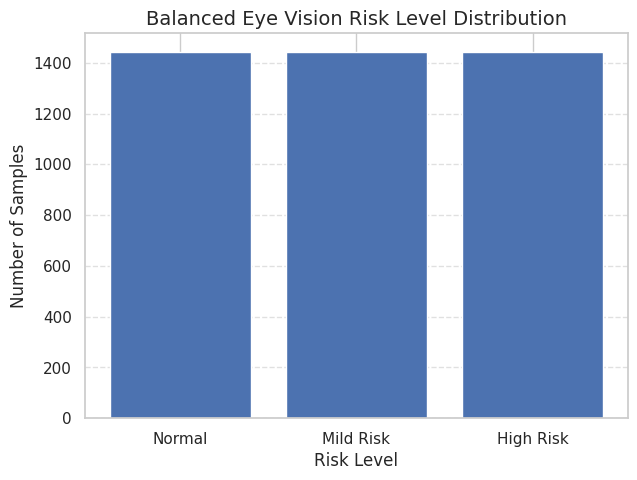

In [ ]:
import matplotlib.pyplot as plt

counts = df_balanced["risk_level"].value_counts().sort_index()

plt.figure(figsize=(7,5))
plt.bar(
    ["Normal", "Mild Risk", "High Risk"],
    counts
)

plt.title("Balanced Eye Vision Risk Level Distribution", fontsize=14)
plt.xlabel("Risk Level")
plt.ylabel("Number of Samples")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pandas as pd

results = []

# Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
results.append(("Decision Tree", accuracy_score(y_test, dt.predict(X_test))))


# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
results.append(("Random Forest", accuracy_score(y_test, rf.predict(X_test))))

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
results.append(("KNN", accuracy_score(y_test, knn.predict(X_test))))

# SVM
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)
results.append(("SVM", accuracy_score(y_test, svm.predict(X_test))))

results_df = pd.DataFrame(results, columns=["Algorithm", "Accuracy"])
results_df.sort_values(by="Accuracy", ascending=False)


,Algorithm,Accuracy
1,Random Forest,0.9975
0,Decision Tree,0.9775
2,KNN,0.9375
3,SVM,0.9000


In [ ]:
test_samples = [
    [18, 0, 3, 0, 0, 45],  # Normal case
    [15, 2, 5, 1, 0, 40],  # Mild risk
    [12, 4, 8, 1, 1, 30]   # High risk
]

for s in test_samples:
    pred = model.predict([s])[0]
    print(s, "→", risk_map[pred])


[18, 0, 3, 0, 0, 45] → Mild Risk
[15, 2, 5, 1, 0, 40] → Mild Risk
[12, 4, 8, 1, 1, 30] → High Risk


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Normal vision sample input
# min_font_size, error_count, screen_time, eye_strain, headache, distance_cm

normal_input = [[
    22,  # min_font_size (large text → good vision)
    0,   # error_count (no mistakes)
    2,   # screen_time (low usage)
    0,   # eye_strain (No)
    0,   # headache (No)
    50   # distance_cm (safe viewing distance)
]]

prediction = model.predict(normal_input)[0]

risk_map = {
    0: "Normal Vision",
    1: "Mild Risk",
    2: "High Risk"
}

print("Predicted Risk Level:", risk_map[prediction])


Predicted Risk Level: High Risk


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import joblib
joblib.dump(rf, "eye_vision_risk_model.pkl")


['eye_vision_risk_model.pkl']

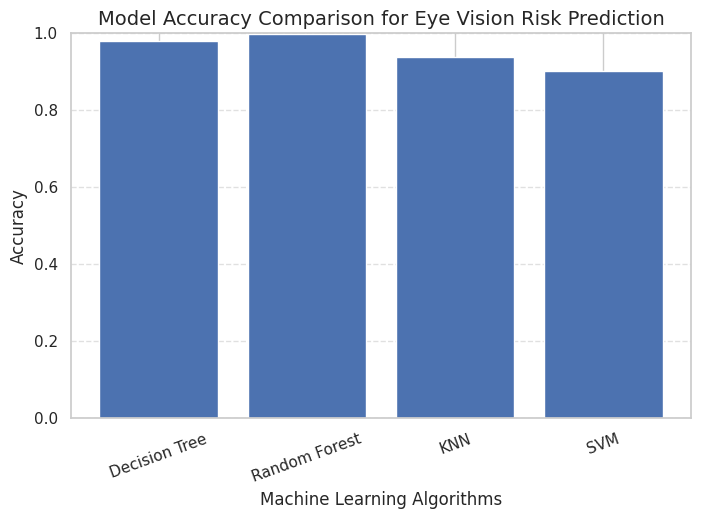

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.bar(
    results_df["Algorithm"],
    results_df["Accuracy"]
)

plt.title("Model Accuracy Comparison for Eye Vision Risk Prediction", fontsize=14)
plt.xlabel("Machine Learning Algorithms", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)

plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.6)

plt.xticks(rotation=20)
plt.show()


In [ ]:
# Use balanced dataset
X_bal = df_balanced.drop("risk_level", axis=1)
y_bal = df_balanced["risk_level"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_bal, y_bal,
    test_size=0.2,
    random_state=42,
    stratify=y_bal
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_balanced = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_balanced.fit(X_train, y_train)

y_pred = rf_balanced.predict(X_test)
print("Balanced Model Accuracy:", accuracy_score(y_test, y_pred))


Balanced Model Accuracy: 1.0


In [ ]:
import joblib

joblib.dump(rf_balanced, "eye_vision_risk_model_balanced.pkl")


['eye_vision_risk_model_balanced.pkl']

In [ ]:
import sklearn
print(sklearn.__version__)


1.6.1
